In [1]:
import numpy as np
import random as rnd
import scipy.spatial.distance as distance
import math
import scipy.stats as stats
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plot
import scipy

In [15]:
def myMahalanobis(x, mu, alpha):
    return np.matmul((x - mu).transpose(),np.matmul(alpha, x - mu))

In [4]:
#def merge(accumulators, ages, alphas, comProbs, covDets, D, j, K, mus, printing, sigmaInv, x)

In [5]:
def create(accumulators, ages, alphas, comProbs, covDets, K, mus, sigmaInv, x):
    accumulators[K] = 1
    ages[K] = 1
    alphas[K] = sigmaInv * np.identity(len(alphas[0]))
    comProbs[K] = 1 / sum(accumulators.values())
    covDets[K] = np.linalg.det(alphas[K]) ** -1
    mus[K] = 0 + x
    #print(mus[K])
    x += 1
    ##print(mus[K])
    #print()
    x -= 1
    K += 1
    return K


In [35]:
#TODO implement logsumexp 
def update(accumulators, ages, alphas, comProbs, covDets, D, j, K, mus, printing, sigmaInv, x):
    dist = myMahalanobis(x, mus[j], alphas[j]) ** 2
    pxj = 1 / ((2 * math.pi) ** (D / 2) * math.sqrt(covDets[j])) * math.exp(-0.5 * dist)

    
    
    
    if printing:
        print(pxj)
    
    pjx = pxj * comProbs[j]
    totProbs = 0
    for i in range(K):
        pxi =  1 / ((2 * math.pi) ** (D / 2) * math.sqrt(covDets[i])) * math.exp(-0.5 * dist)
        totProbs += pxi * comProbs[i]
        
    if totProbs = 0:
        print(comProbs)
        print()
    
    pjx /= totProbs
    
    if printing:
        print(pjx)
    
    ages[j] += 1
    accumulators[j] += pjx
    
    ej = x - mus[j]
    weight = pjx / accumulators[j]
    
    deltaMu = weight * ej
    #print('mu1 = {}'.format(mus[j]))
    mus[j] += deltaMu
    #print('mu2 = {}'.format(mus[j]))
    
    oldAlpha = alphas[j]
    ejStar = x - mus[j]
    newAlpha = oldAlpha / (1 - weight) - (weight / (1 - weight) ** 2) * np.matmul(np.matmul(oldAlpha, ejStar), np.matmul(ejStar.transpose(), oldAlpha)) \
            / (1 + (weight / (1 - weight)) * np.matmul(np.matmul(ejStar.transpose(), oldAlpha),ejStar))
    alphas[j] = newAlpha +  (np.matmul(np.matmul(newAlpha, mus[j]), np.matmul(mus[j].transpose(), newAlpha))) \
            / (1 - np.matmul(np.matmul(mus[j].transpose(), newAlpha), mus[j]))
    
    comProbs[j] = accumulators[j] / sum(accumulators.values())
    
    newCovDet = (1 - weight) ** D * covDets[j] * (1 + weight/(1 - weight) * np.matmul(ejStar.transpose(), np.matmul(oldAlpha, ejStar)))
    covDets[j] = newCovDet * (1 - np.matmul(deltaMu.transpose(), np.matmul(newAlpha, deltaMu)))

    return mus
    

SyntaxError: invalid syntax (Temp/ipykernel_7172/2393477153.py, line 18)

In [7]:
def remove(accumulators, ages, alphas, comProbs, correspondingData, covDets, j, mus, remainingK):
    correspondingData[-1].append(correspondingData[j])
    
    for i in range(j,len(ages) - 1):
        accumulators[i] = accumulators.pop(i + 1)
        ages[i] = ages.pop(i + 1)
        alphas[i] = alphas.pop(i + 1)
        comProbs[i] = comProbs.pop(i + 1)
        correspondingData[i] = correspondingData.pop(i + 1)
        covDets[i] = covDets.pop(i + 1)
        mus[i] = mus.pop(i + 1)
    
    comProbs = removeHelper(comProbs, accumulators)
    return comProbs

In [8]:
#TODO find workaround for type to use logsumexp
def removeHelper(comProbs, accumulators):
    val = len(accumulators)
    for i in range(val):
        summed = 0
        for j in range(val):
            summed += accumulators[j]
        comProbs[i] = accumulators[i] / summed
    return comProbs

In [13]:
def generateData(plotting = False):
    #TODO create dict to map key to data correspondence to mu/sigma, 4 keys, mu, sigma, discover mu, discover sigma 
    D = 4; K = 0; Beta = 0.05; delta = 0.01
    vmin = 5; spmin = 3
    mus = np.ndarray([D + 1,2]); sigmas = np.ndarray([D+1,2,2])
    mus = np.array([[1, 1], [10, 10], [10,1], [1,10], [5,5]])
    
    for i in range(D + 1):
        sigmas[i] = [[1, 0], [0, 1]]

    startingMus = mus
    numvectors = 250; lenvectors = 2
    X = np.ndarray((numvectors, lenvectors))



    for i in range(numvectors):
        index = i % (D + 1)
        
        for j in range(lenvectors):
            X[i] = np.random.multivariate_normal(mus[index], sigmas[index])
    if plotting:       
        Xs = [[],[],[],[],[]]
        Ys = [[],[],[],[],[]]
        colors = ['r','b','g','y','m']

        for i in range(len(X)):
            index = i % 5
            Xs[index].append(X[i,0])
            Ys[index].append(X[i,1])

        for i in range(5):
            plot.scatter(Xs[i], Ys[i], c =colors[i])
            
    return [X, startingMus, sigmas]

In [10]:
def myMahalanobis(x, mu, alpha):
    return np.linalg.matmul((x - mu).transpose(),np.linalg.matmul(alpha, x - mu))

In [59]:
def simulate(X, sigmas, startingMus, delta = 1, dimension = 2, D = 4, vmin = 5, spmin = 3, printing = False):
    sigma = np.std(X[:10]) #sigma should be representative of only a part of the data stream
    sigmaInv = delta * (sigma) ** -1
    alpha = sigmaInv * np.identity(dimension)
    covarDet = np.linalg.det(alpha) ** -1

    alphas = {}
    mus = {}
    covDets = {}
    comProbs = {}
    ages = {}
    accumulators ={}
    correspondingData = {}

    alphas[0] = alpha
    covDets[0] = covarDet
    mus[0] = X[0]
    comProbs[0] = 1
    ages[0] = 1
    accumulators[0] = 1
    K = 1
    remainingK = D
    correspondingData[0] = [0]
    correspondingData[-1] = []
    
    for i in range(len(X)):
        if i == 0:
            continue
        updated = False

        for j in range(K):
            if j >= K:
                break
#             if (ages[j] > vmin) and (accumulators[j] < spmin):
#                 comProbs = remove(accumulators, ages, alphas, comProbs, correspondingData, covDets, j, mus, remainingK)
#                 remainingK += 1
#                 K -= 1
                
#                 if printing:
#                     print('call remove')
#                     print()

        for j in range(K):
            if i == j:
                continue

            
            dist = myMahalanobis(X[i], mus[j], alphas[j]) ** 2
            if printing:
                print('(' + str(i) + ', ' + str(j) + ')')
                print(dist)

            
            if dist < 10:
                if printing:
                    print('call update')
                    print()
                correspondingData[j].append(i)
                mus = update(accumulators, ages, alphas, comProbs, covDets, D, j, K, mus, printing, sigmaInv, X[i])
                #print('mu3 = {}'.format(mus[j]))
                #print()
                updated = True

            ##!!!!!! This may be problematic, only comparing means
        if K > 1:
            for i1 in range(K):
                for j1 in range(i):
                    if i1 == j1:
                        continue
                    if i1 < K and j1 < K:
                        mat = (np.linalg.inv(alphas[i1]) + np.linalg.inv(alphas[j1])) / 2
                        alp = np.linalg.inv(mat)
                        comDist = myMahalanobis(mus[i1], mus[j1], alp) ** 2
                        if comDist < 0.1:
                            
                            #print('merged')
                            #print('i = {}, j = {}, meani = {}, meanj = {}'.format(i1, j1, mus[i1], mus[j1]))
                            #print()
                            for k in correspondingData[i1]:
                                #print('correspondingData = {}'.format(correspondingData[i1]))
                                #print('correspondingData = {}'.format(correspondingData[j1]))
                                if k not in correspondingData[j1]:
                                    update(accumulators, ages, alphas, comProbs, covDets, D, i1, K, mus, printing, sigmaInv, X[k])
                                    correspondingData[i1].append(k)
                                #print('correspondingData = {}\n'.format(correspondingData[i1]))
                            remove(accumulators, ages, alphas, comProbs, correspondingData, covDets, j1, mus, remainingK)
                            remainingK += 1
                            K -= 1
         ## end !!!!!!
    
        
        if not updated and remainingK == 0:
            correspondingData[-1].append(i)
        
        if not updated and not remainingK == 0:
            if printing:
                print('call create')
                print()
            correspondingData[K] = [i]
            K = create(accumulators, ages, alphas, comProbs, covDets, K, mus, sigmaInv, X[i])
            remainingK -= 1
            

    if printing:
        print(K)
    norms = np.ndarray([D + 1, K])
    difference = 0
    correspondences = np.ndarray(D + 1)
    for i in range(D + 1): #D + 1 = len(startingMus)
        for j in range(K):
            norms[i, j] = np.linalg.norm(startingMus[i] - mus[j])
        index = np.argmin(norms[i])
        difference += norms[i,index]
        correspondences[i] = index
        
        if printing:
            print("mu = {}, sigma = {}".format(mus[index], np.linalg.inv(alphas[index])))
            print("starting mu = {}, starting Sigma = {}".format(startingMus[i], sigmas[i]))
            print("corresponding data = {}\n".format(correspondingData[index]))


        #TODO handle case when
    if printing:
        print(str(difference) + '\n')
        print(correspondingData)
            
    
    return [alphas, correspondingData, difference, mus, K, comProbs, covDets]

In [33]:
def getSoftProbs(alphas, comProbs, covDets, K, mus, outliers, Xini):
    X = np.copy(Xini)
    D = K - 1
    softProbs = np.ndarray([len(outliers),K])
    probs = np.ndarray([K])
    for i in range(len(outliers)):
        for j in range(K):
            dist = myMahalanobis(X[i], mus[j], alphas[j]) ** 2
            probs[j] = 1 / ((2 * math.pi) ** (D / 2) * math.sqrt(covDets[j])) * math.exp(-0.5 * dist) * comProbs[j]

        probsum = sum(probs)
        
        for j in range(K):
            softProbs[i,j] = probs[j] / probsum
    return softProbs
        

In [74]:
Data = generateData(False)
Xini = np.copy(Data[0])
sievedData = sieve(Data)
print(sievedData[0])
print(sievedData[1])
print(min(sievedData[2]))
print(sievedData[2])
print(0 in sievedData[2])
#[alphas, correspondingData, difference, mus, K, comProbs, covDets] = simulate(X = Data[0], sigmas = Data[2], startingMus = Data[1], printing = False)
#alphas = simulatedData[0]
#correspondingData = simulatedData[1]
#mus = simulatedData[3]

#softProbs = getSoftProbs(alphas, comProbs, covDets, K, mus, correspondingData[-1], Xini)
#print(len(softProbs))
#print(softProbs)



3.2645987543730017
1
3.2645987543730017
[5.17454375 3.26459875 3.42218638 3.67811189 3.35836628 3.73424249
 3.33564351 3.64641744 3.33914476 3.71198025 3.3533405  3.73512791
 3.33552449 3.64641753 3.33914189 3.71198066 3.35334037 3.73512792
 3.33552449 3.64641753 3.33914189 3.71198066 3.35334037 3.73512792
 3.33552449 3.64641753 3.33914189 3.71198066 3.35334037 3.73512792
 3.33552449 3.64641753 3.33914189 3.71198066 3.35334037 3.73512792
 3.33552449 3.64641753 3.33914189 3.71198066 3.35334037 3.73512792
 3.33552449 3.64641753 3.33914189 3.71198066 3.35334037 3.73512792
 3.33552449 3.64641753]
False


In [73]:
def sieve(Data, K = 5, D = 4, printing = False, trials = 50):
    
    savedData = np.copy(Data)
    differences = np.ndarray(trials)
    X = Data[0]; sigmas = Data[2]; startingMus = Data[1]
    
    for t in range(trials):
        [alphas, correspondingData, difference, mus, K, comProbs, covDets] = simulate(X = Data[0], sigmas = Data[2], startingMus = Data[1], printing = False)

    
        norms = np.ndarray([D + 1, K])
        difference = 0
        correspondences = np.ndarray(D + 1)

        for i in range(D + 1): #D + 1 = len(startingMus)
            for j in range(K):
                norms[i, j] = np.linalg.norm(startingMus[i] - mus[j])
            index = np.argmin(norms[i])
            difference += norms[i,index]
            correspondences[i] = index
            if printing:    
                print("mu = {}, sigma = {}".format(mus[index], np.linalg.inv(alphas[index])))
                print("starting mu = {}, starting Sigma = {}".format(startingMus[i], sigmas[i]))
                print("corresponding data = {}\n".format(correspondingData[index]))


        if printing:
            print(str(difference) + '\n')
            print(correspondingData)

        if t == 0:
            mindifference = difference
            besti = 0

        elif mindifference > difference:
            mindifference = difference
            besti = t

        differences[t] = difference

        Data = np.copy(savedData)
        X = np.roll(Data[0],1); sigmas = Data[2]; startingMus = Data[1]


    return [mindifference, besti, differences]

In [ ]:
#TODO find workaround for type for logsumexp
#print(accumulators)
#list1 = accumulators.values()
#print(sum(list1))
#scipy.special.logsumexp(np.array(list1))

In [ ]:
summation = 0
for i in range(len(mus)):
    summation += len(correspondingData[i])
print(summation)
print(correspondingData)

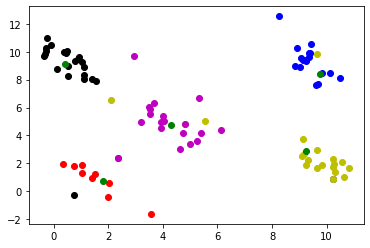

In [18]:
colors = ['r', 'b', 'y', 'k', 'm']
for i in range(len(mus)):
    plot.figure(1)
    A = correspondingData[i]
    Xs_to_plot = Xini[A,0]
    Ys_to_plot = Xini[A,1]
    plot.scatter(Xs_to_plot, Ys_to_plot, c = colors[i])
    plot.scatter((mus[i][0]), (mus[i][1]), c = 'g')



In [ ]:
arr = {}
arr[0] = mus[0]
arr[1] = mus[0]
arr[2] = mus[1]
arr[0] = arr.pop(1)
arr[1] = arr.pop(2)
print(arr)
